# Project 02 - Research on Video games(2004 to 2010)

## 1. Introduction

### Dataset introduction:

I use the "Video Games" dataset collected and collated by Dr. Joe Cox. The data set includes more than 1,000 video games released between 2004 and 2010. The dataset, which collects a variety of factors that influence game sales, was originally designed to study what makes a blockbuster video game.

### Populations and Samples:

The data set includes more than 1,000 video games released between 2004 and 2010, but does not include all video games released worldwide. So we took this dataset as a sample, and the population of interest was all video games released between 2004 and 2010

### Research Questions:

1. For all video games released between 2004–2010 (population), what percentage of video games is Action games ?
2. For all video games released between 2004–2010 (population), the median review score should be greater than 80?

### Contextual Importance:

All members of our team are very interested in video games, and through this research, we can find out what is relevant to game sales and provide strategic advice to all parties in the game development industry. Game developers can develop strategies based on these conclusions to make their games more competitive and sell more.

In [18]:
#Imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf

In [19]:
df = pd.read_csv('video_games.csv', encoding='unicode-escape')
df

,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,...,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
0,Nintendo DS,Super Mario 64 DS,4.69,1,1,1,1,2004,1,0,...,0,0,0,0,0,1,0,0,0,1
1,Sony PSP,Lumines: Puzzle Fusion,0.56,0,0,0,1,2004,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Nintendo DS,WarioWare Touched!,0.54,0,0,0,1,2004,1,0,...,0,0,0,0,0,1,1,1,1,1
3,Sony PSP,Hot Shots Golf: Open Tee,0.49,0,0,0,0,2004,1,0,...,0,0,0,0,0,0,0,0,0,1
4,Nintendo DS,Spider-Man 2,0.45,0,0,0,0,2004,1,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,PlayStation 3,MotoGP 09/10,0.04,0,0,0,0,2010,0,0,...,0,0,0,0,1,0,0,0,0,1
1766,PlayStation 3,Prison Break: The Conspiracy,0.04,0,0,0,0,2010,0,0,...,0,0,0,0,0,0,0,0,0,1
1767,Nintendo Wii,"Sakura Wars: So Long, My Love",0.04,0,0,0,0,2010,0,0,...,0,0,0,0,0,0,0,0,0,1
1768,X360,Record of Agarest War (The Really Naughty Limi...,0.04,0,0,0,0,2010,0,0,...,0,0,0,0,0,0,1,0,0,0


## 2. Confidence Interval Analytical Tasks

### Research Question

Descriptive questions (for sample): What percentage of the current sample "video games" are  Action games?

### Dataset cleaning:

In [20]:
df["Action"].isna().sum()

np.int64(0)

No additional cleaning steps are required since there are no missing data.

### Descriptive analytics:

##### Report sample size:

In [21]:
n = len(df)
n

1770

Sample size is 1770

##### Numerical summaries:

In [22]:
p_hat = len(df[df["Action"]==1]) / n
p_hat

0.607909604519774

##### Interpret:

In our sample("video games), 60.79% of video games are "Action" games.

### Create a confidence interval:

We choose 95% confidence level

In [23]:
list=[]
for i in range(5000):
    sample = df.sample(len(df),replace=True)
    list.append({"sample_proportion":len(sample[sample["Action"]==1])/len(sample)})
df_samdist = pd.DataFrame(list)
df_samdist

,sample_proportion
0,0.590395
1,0.613559
2,0.602260
3,0.620904
4,0.615254
...,...
4995,0.607345
4996,0.615254
4997,0.624294
4998,0.607345


##### Estimate confidence interval:

In [24]:
upper = df_samdist["sample_proportion"].quantile(0.975)
lower = df_samdist["sample_proportion"].quantile(0.025)
print(upper)
print(lower)

0.6310734463276836
0.5853107344632769


### Interpret confidence interval:

At a 95% confidence level, we believe that the proportion of all video games released between 2004 and 2010 (population) is "Action" games is between 0.631 and 0.585

## 3. Hypothesis Testing Analytical Tasks

### Research Question:

Descriptive questions (for sample): What is the distribution of game ratings in our sample (2004-2010)?

Inference problem (for population): If we were to take a random sample of all games released between 2004 and 2010, would the median review score of there video games really be significantly greater than 80?

### Dataset Cleaning:

In [25]:
df['Review Score'].isna().sum()

np.int64(0)

No additional cleaning steps are required since there are no missing data.

### Descriptive Analytics

##### Numerical summaries:

In [26]:
df['Review Score'].describe()

count    1770.000000
mean       68.428814
std        13.894937
min        12.000000
25%        60.000000
50%        70.000000
75%        79.000000
max        98.000000
Name: Review Score, dtype: float64

##### Visualization：

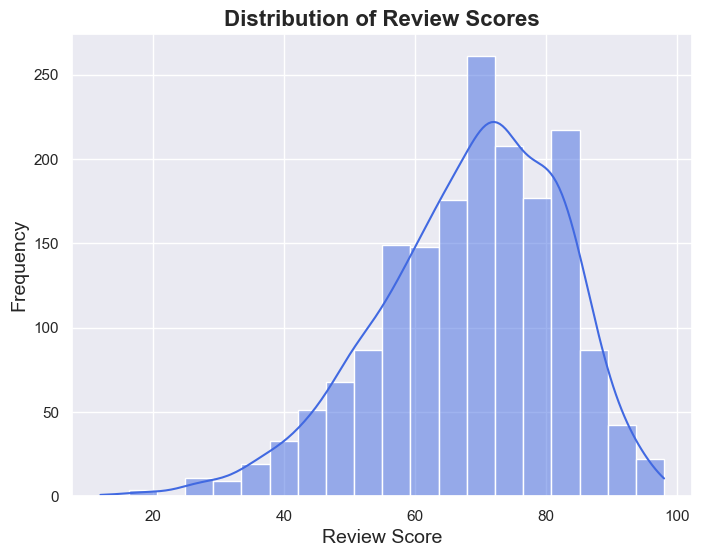

In [32]:
plt.figure(figsize=(8,6))
sns.histplot(df['Review Score'], bins=20, kde=True, color='royalblue')

plt.title("Distribution of Review Scores", fontsize=16, fontweight='bold')
plt.xlabel("Review Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()


##### Interpret the results：

From the descriptive statistics and histogram, we observe that the review scores have a mean of 68.43 and a median of 70, with a standard deviation of 13.89, the range is 12 to 98. The histogram suggests a left-skewed distribution, the IQR is about 19, and there has some outliers in the distribution.

##### Appropriate measure of center:

In this distribution, the scores are slightly skewed to the left overall, with some low score tails pulling down the mean.
Therefore, the median here is more representative of the rating level of a "typical" game and is relatively unaffected by outliers.

### Perform a Hypothesis Test: 

##### State hypotheses:

H0: M = 80; Ha: M > 80

M is the true population median review score of all video games between 2004 and 2010

##### Select a significance level:

We chose α=0.05 as the significance level

##### Check the conditions:

Randomlized: The sample we used was a random sample of all games from 2004 to 2010 and is fairly representative.


Independence: Review score of video games are independent of each other

##### Simulate a sampling distribution:

In [28]:
obs_median = df["Review Score"].median()
median = 80

In [29]:
df["Review"] = df["Review Score"] - obs_median + median

In [30]:
sample_list = []
for i in range(5000):
    my_sample = df.sample(len(df), replace=True)
    sample_list.append({"median":my_sample["Review"].median()})
sample_dist = pd.DataFrame(sample_list)
sample_dist

,median
0,79.0
1,80.0
2,80.0
3,80.5
4,80.0
...,...
4995,81.0
4996,81.0
4997,80.0
4998,81.0


##### Calculate a p-value:

In [31]:
len(sample_dist[sample_dist["median"]>80])/len(sample_dist)

0.1838

##### Making decision and state a conclusion:

Because p-value(0.178) > significance level(0.05), we do not reject null hypothesis. So we cannot conclude there is sufficient evidence to support that the true median review score of all video games between 2004 and 2010 is greater than 80.

### Interpret significance level & p-value:

##### Significance level:

When null hypothesis is true, we have 5% probability to reject the null hypothesis. we accept up to a 5% risk of incorrectly rejecting H0 when it is actually true.

##### P-value:

Assuming the null hypothesis is true, We have 17.68% probability of observing a sample median of review score as 80 or more.

## 4. Conclusion

### Summarization:

In this project, we use video_games dataset to research two question. In our confidence interval analysis, we examined the proportion of “Action” games in the dataset (2004–2010). At a 95% confidence interval, we conclude that the proportion of all video games released between 2004 and 2010 (population) is "Action" games is between 0.631 and 0.585. For the hypothesis test, we focused on whether the true median review score exceeded 80.we obtained a p‐value of about 0.1768, which is higher than our chosen 5% significance level. Consequently, we could not reject the null hypothesis; in other words, we do not have sufficient statistical evidence to conclude that the median rating is greater than 80.

### Limitations:

The dataset may not include every single game from 2004–2010, so our results might not perfectly generalize to the entire population of all games released during that period. Review scores can be subjective, influenced by platform, Posting area, or reviewer bias. Such as malicious ratings from competitors, which can affect our results

### Future work:

In future work, we can use regression to analyze the relationship between various variables in the data set and video game sales. Then identify these variables to better help game developers adjust their development and operations decisions.